In [52]:
#Galpy imports
import galpy
from galpy.orbit import Orbit
import galpy.potential as p
from galpy.potential import MWPotential2014 as MWPotential
from galpy.util import coords, conversion #for unit conversions

#Other imports
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
from astropy import units as u

# 1) Does galpy account for Solar position around the galactic center to convert galactocentric units to ($\alpha$, $\delta$)?

In [82]:
#a) Get an object and wind it back in time to get galactocentric position
orb = Orbit.from_name("Betelgeuse")
t = np.linspace(0,4,num=1000)*u.Gyr
orb.integrate(t, MWPotential)

PC = [orb.x(t[-1]),orb.y(t[-1]),orb.z(t[-1]),
      orb.vx(t[-1]), orb.vy(t[-1]), orb.vz(t[-1])]

#b) Use galpy orbit object to convert galactocentric position to ra and dec

PC_galpy = [orb.ra(t[-1]),orb.dec(t[-1]),orb.dist(t[-1]),
            orb.pmra(t[-1]), orb.pmdec(t[-1]), orb.vlos(t[-1])]

#c) Use outside system to convert galactocentric position to ra and dec in current day 
pc = coord.SkyCoord(x=PC[0]*u.kpc, y=PC[1]*u.kpc, 
                     z=PC[2]*u.kpc, v_x=PC[3]*u.km/u.s, 
                     v_y=PC[4]*u.km/u.s, v_z=PC[5]*u.km/u.s,
                    frame=coord.Galactocentric)

pc_astropy = pc.transform_to('icrs')

PC_astropy = [pc_astropy.ra.value, pc_astropy.dec.value, pc_astropy.distance.value
             , pc_astropy.pm_ra_cosdec.value, pc_astropy.pm_dec.value, 
              pc_astropy.radial_velocity.value]

#d) Compare
print(PC_galpy)
print(PC_astropy)
for i in range(6):
    A = PC_galpy[i] - PC_astropy[i]
    print(A)

[296.2922056854259, 21.75386986547651, 8.798055231773514, -2.1341475929108875, -5.047607922657152, -14.795054749500885]
[283.6020053288758, -0.246413094790317, 13.721854012561307, 0.3915853010974696, -0.3440041250883636, -253.96994938319145]
12.690200356550122
22.000282960266826
-4.923798780787793
-2.525732894008357
-4.703603797568788
239.17489463369057


It appears that both astropy and galpy return similar values for ra and dec such that their differences are neglible. This suggests that galpy does not account for stellar motion in when it converts in coordinate systems over Myr to Gyr intervals. Thus, the ra and dec values returned by galpy orbit objects are values that only apply to our current galactic position. 

Implications: 
We got the past galactocentric values from the ra and dec values produced by galpy. Since those values only apply if the Sun was in the same galactocentric position as it was 4 Gyr ago, we can model the simulation such that the Sun was stationary in the galactic disk for those 4 Gyr. 

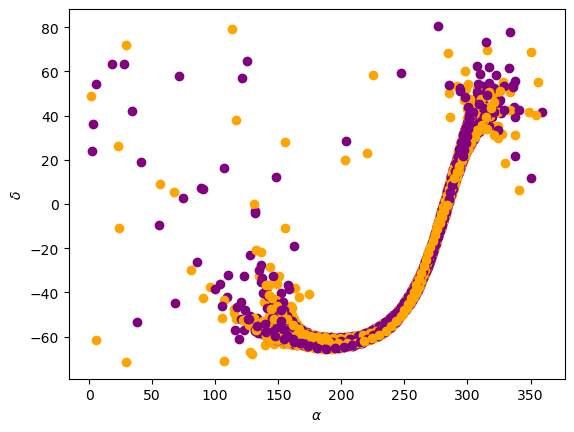

In [83]:
for n in range(len(t)):
    #print(n)
    #galpy ra dec through orbit (don't know if Earth is still)
    C = [orb.ra(t[n]),orb.dec(t[n]),orb.dist(t[n]),
      orb.pmra(t[n]), orb.pmdec(t[n]), orb.vlos(t[n])]
    
    #galpy galactocentric param through orbit
    CG = [orb.x(t[n]), orb.y(t[n]), orb.z(t[n])]
    #astropy ra dec through orbit based on galpy galactocentric (assume Earth is still)
    cg = coord.SkyCoord(x=CG[0]*u.kpc, y=CG[1]*u.kpc, z=CG[2]*u.kpc,
                        frame=coord.Galactocentric)
    c = cg.transform_to('icrs')
    
    #Plot
    plt.scatter(C[0], C[1], color="purple", label="galpy")
    plt.scatter(c.ra.value, c.dec.value, color="orange", label="astropy")
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"$\delta$")
    #plt.legend()

[88.79293898999998, 7.407063999999981, 0.1526717557251906]
[295.7006095570413, 27.14404057445314, 8.39428154999239]
[283.5288058089478, -2.155935489078722, 14.21681305202963]
[264.72242300367594, -29.08700498454878, 16.056635547091783]
[235.8793296598306, -55.66354326864117, 13.237350238739598]
[166.27367584940293, -61.62444820709167, 6.730183133903443]
[320.48772458027395, 67.83462798000295, 1.6182506213716925]
[295.63498994099785, 18.69107360064161, 9.40353184858807]
[276.589259432558, -9.890925489603799, 14.877650820749661]
[258.89306319995256, -38.40446248925074, 16.016481172729126]
[223.72818321854865, -60.60209241985921, 12.569163281732514]
[163.4062445382334, -55.11415945923988, 5.482100337399186]
[311.76438309342007, 34.53595764481333, 3.5867524995545117]
[287.5056225223911, 10.741212673979348, 11.654444338355889]
[273.49573126459927, -16.42304170556339, 16.09230845720591]
[256.5606682934217, -42.95535211081907, 15.8277284227694]
[212.29372910313853, -59.427716776395236, 10.882

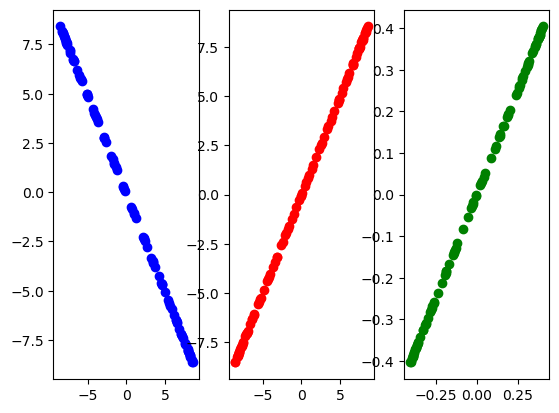

In [79]:
fig,axs = plt.subplots(1,3)
for n in range(len(t)):

    IC = [orb.ra(t[n]),orb.dec(t[n]),orb.dist(t[n])]
    print(IC)
 
    ic = coord.SkyCoord(ra=IC[0]*u.deg, dec=IC[1]*u.deg, distance=IC[2]*u.kpc,
                        frame='icrs')
    ic_galpy = [orb.x(t[n]),orb.y(t[n]),orb.z(t[n])]
    ic_astropy = ic.transform_to(coord.Galactocentric)
    #print(ic_galpy, ic_astropy)
    axs[0].scatter(ic_galpy[0], ic_astropy.x.value, color="blue")
    axs[1].scatter(ic_galpy[1], ic_astropy.y.value, color="red")
    axs[2].scatter(ic_galpy[2], ic_astropy.z.value, color="green")
    

[88.79293898999998, 7.407063999999981, 0.1526717557251906] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (94.82606314, -41.09725891, 0.05961499)>
[295.7006095570413, 27.14404057445314, 8.39428154999239] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (295.30380622, 26.49995807, 8.45090331)>
[283.5288058089478, -2.155935489078722, 14.21681305202963] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (283.40354537, -2.37678274, 14.32110674)>
[264.72242300367594, -29.08700498454878, 16.056635547091783] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (264.73620446, -29.08653986, 16.17857459)>
[235.8793296598306, -55.66354326864117, 13.237350238739598] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (236.29083096, -55.48008107, 13.33812149)>
[166.27367584940293, -61.62444820709167, 6.730183133903443] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (168.1678282, -61.98674691, 6.77413796)>
[320.48772458027395, 67.834

[256.9755245597034, -42.729753528204526, 15.911606234659631] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (257.06159149, -42.62989164, 16.02902872)>
[214.72563157819565, -59.49716665188045, 11.812082420490352] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (215.51726439, -59.36439563, 11.89685986)>
[153.6420503222304, -57.73553836939528, 4.127464901180796] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (156.25256063, -58.6218147, 4.15701011)>
[304.8243414090163, 32.44317740381479, 5.085014123412001] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (303.9530419, 31.38337796, 5.12522769)>
[284.87640091392916, 7.486983169872199, 12.654470601911381] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (284.72342966, 7.16450013, 12.74741969)>
[273.33646914284594, -20.58807235592346, 16.322709665999792] <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    (273.28953122, -20.65124699, 16.44266769)>
[250.65982932987444, -4

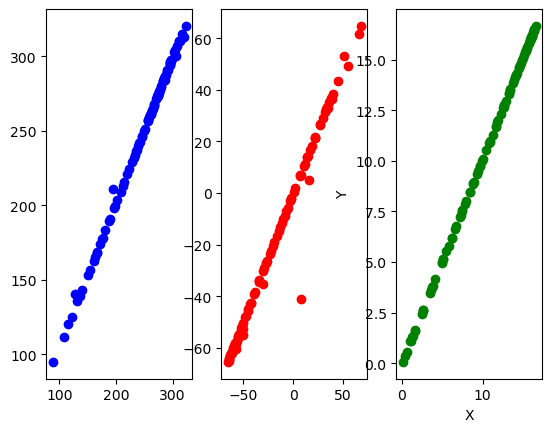

In [75]:
fig,axs = plt.subplots(1,3)
for n in range(len(t)):

    IC = [orb.x(t[n]),orb.y(t[n]),orb.z(t[n])]
 
    ic = coord.SkyCoord(x=-IC[0]*u.kpc, y=IC[1]*u.kpc, z=IC[2]*u.kpc,
                        frame=coord.Galactocentric)
    ic_galpy = [orb.ra(t[n]),orb.dec(t[n]),orb.dist(t[n])]
    ic_astropy = ic.transform_to("icrs")
    print(ic_galpy, ic_astropy)
    axs[0].scatter(ic_galpy[0], ic_astropy.ra.value, color="blue")
    axs[1].scatter(ic_galpy[1], ic_astropy.dec.value, color="red")
    axs[2].scatter(ic_galpy[2], ic_astropy.distance.value, color="green")
    plt.xlabel("X")
    plt.ylabel("Y")